In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
font = {'size'   : 12}

mpl.rc('font', **font)

In [3]:
DOE_NAME = "doe5"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [4]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv

In [5]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["RMSE"] = df_res["RMSE"].fillna(1000)
df_res["FIT"] = df_res["FIT"] * (df_res["FIT"] > 0) # minimum fit to 0% (easier to interpret)
df_res["FIT"] = df_res["FIT"].fillna(0.0)
#df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [6]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

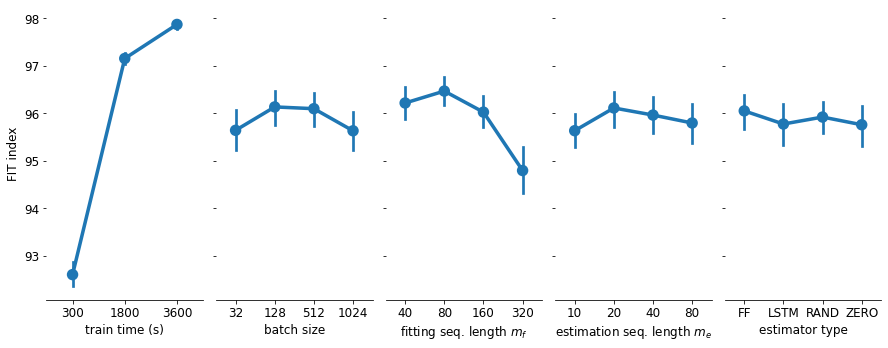

In [7]:
# Full results: main effects
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["train time (s)",
                "batch size",
                "fitting seq. length $m_f$",
                "estimation seq. length $m_e$",
                "estimator type"]
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors, # all factors
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0, idx].yaxis.set_label_text("FIT index")
plt.tight_layout()
plt.savefig("wh_main_effects.pdf")
# Biggest effect seems to be max_time

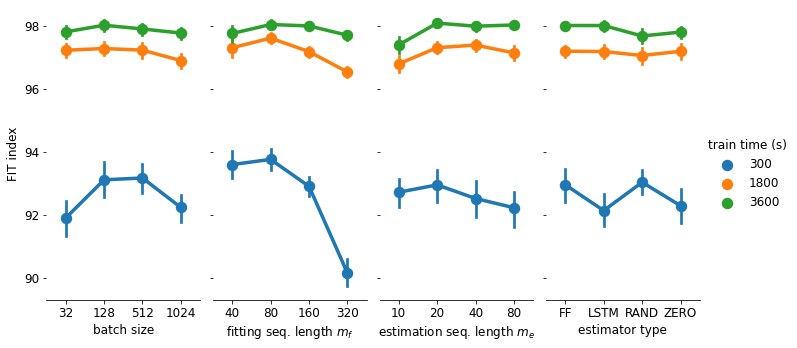

In [8]:
# Full results: main effects
factors = ["batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["batch size",
                "fitting seq. length $m_f$",
                "estimation seq. length $m_e$",
                "estimator type"]
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors, # all factors
                 hue="max_time",
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)
for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0, idx].yaxis.set_label_text("FIT index")
plt.tight_layout()
g.add_legend(title = "train time (s)")
plt.savefig("wh_train_time_interactions.pdf")
# Biggest effect seems to be max_time

In [9]:
df_short_est = df_res[(df_res["seq_est_len"] == 10) & (df_res["max_time"] == 3600)]

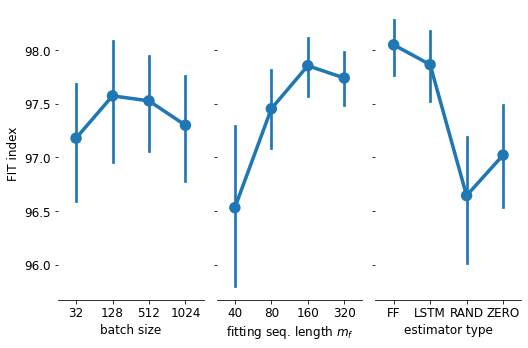

In [10]:
# Full results: main effects
factors = ["batch_size", "seq_len", "est_type"]
factor_names = ["batch size", "fitting seq. length $m_f$", "estimator type"]
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=["batch_size", "seq_len", "est_type"],
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)
for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0, idx].yaxis.set_label_text("FIT index")
plt.tight_layout()
plt.savefig("wh_main_effects_restricted.pdf")
# Biggest effect seems to be max_time

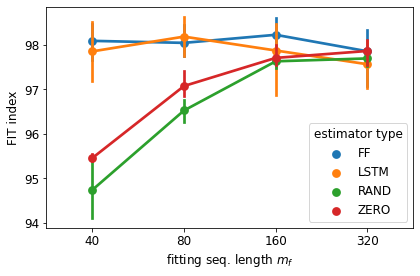

In [14]:
g = sns.pointplot(x="seq_len", y=response, hue="est_type", data=df_short_est);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("fitting seq. length $m_f$");
g.legend(title = "estimator type");
plt.tight_layout()
plt.savefig("wh_est_type_interactions_restricted.pdf")